# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

from xgboost import XGBClassifier, XGBRegressor, XGBRanker

import sys

sys.path.append("..")

from utils.custom_cvs import VariableTimeSeriesSplit
from utils.visualization import model_test
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
    balanced_accuracy_1interval_ranker,
    mean_absolute_1interval_ranker,
)

import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the validation of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/final_model.csv")

mid_rc = df.groupby("raceYear")["raceRound"].max().to_numpy() // 2
get_half = lambda x: f'{x["raceYear"]}{x["raceRound"] <= mid_rc[x["raceYear"] - 2006]}'
instances_per_half = df.apply(get_half, axis=1).value_counts(sort=False).to_numpy()

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

scorers_ranker = [
    balanced_accuracy_1interval_ranker,
    mean_absolute_1interval_ranker,
]

X = pd.read_csv("../assets/data/processed/final_model_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=31):
CV with make_scorer(balanced_accuracy_1interval_score): 0.30046491520175733
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.0308351673519005
              precision    recall  f1-score   support

           1       0.46      0.85      0.59       252
           2       0.55      0.81      0.65       252
           3       0.39      0.40      0.40       252
           4       0.42      0.30      0.35       252
           5       0.29      0.24      0.26       252
           6       0.25      0.34      0.29       252
           7       0.25      0.32      0.28       252
           8       0.25      0.27      0.26       252
           9       0.26      0.27      0.27       251
          10       0.24      0.24      0.24       252
          11       0.26      0.23      0.24       250
          12       0.28      0.28      0.28       247
          13       0.27      0.25      0.26       244
          14

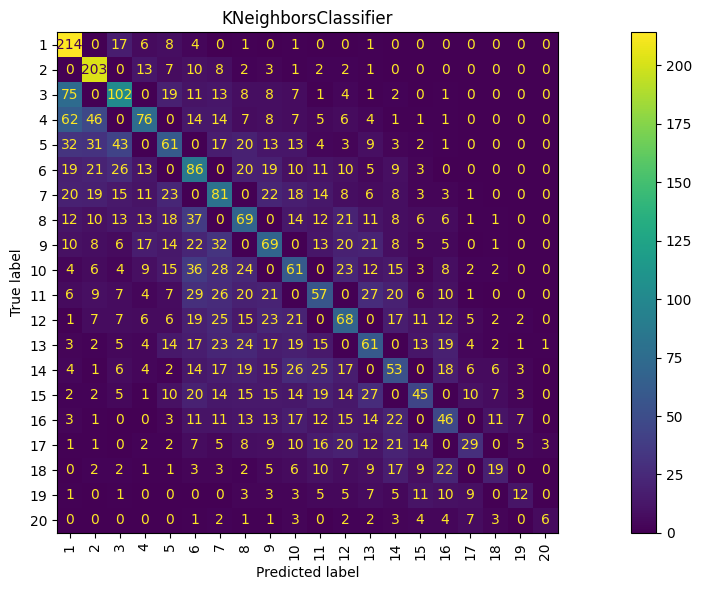

In [3]:
knn = KNeighborsClassifier(n_neighbors=31, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3662371349458552
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.396004680424357
              precision    recall  f1-score   support

           1       0.67      0.78      0.72       252
           2       0.66      0.75      0.70       252
           3       0.52      0.62      0.57       252
           4       0.45      0.46      0.45       252
           5       0.47      0.35      0.40       252
           6       0.32      0.40      0.35       252
           7       0.37      0.48      0.42       252
           8       0.34      0.31      0.33       252
           9       0.33      0.25      0.28       251
          10       0.37      0.22      0.28       252
          11       0.26      0.30      0.28       250
          12       0.29      0.45      0.35       247
          13       0.32      0.43      0.37       244
          14 

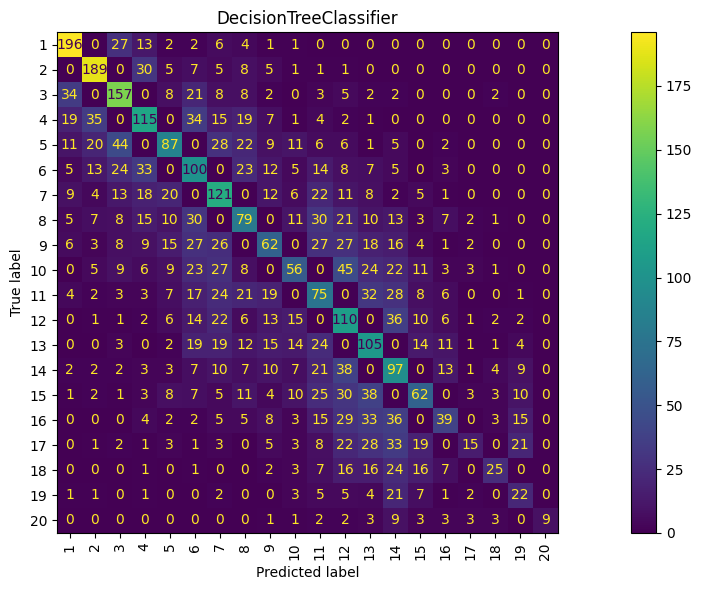

In [4]:
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=303):
CV with make_scorer(balanced_accuracy_1interval_score): 0.400653022325494
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.251820535859503
              precision    recall  f1-score   support

           1       0.60      0.88      0.71       252
           2       0.67      0.81      0.73       252
           3       0.56      0.58      0.57       252
           4       0.49      0.48      0.48       252
           5       0.40      0.41      0.41       252
           6       0.39      0.51      0.44       252
           7       0.29      0.39      0.33       252
           8       0.52      0.39      0.45       252
           9       0.30      0.28      0.29       251
          10       0.29      0.25      0.27       252
          11       0.39      0.35      0.37       250
          12       0.29      0.38      0.33       247
          13       0.41      0.39      0.40       2

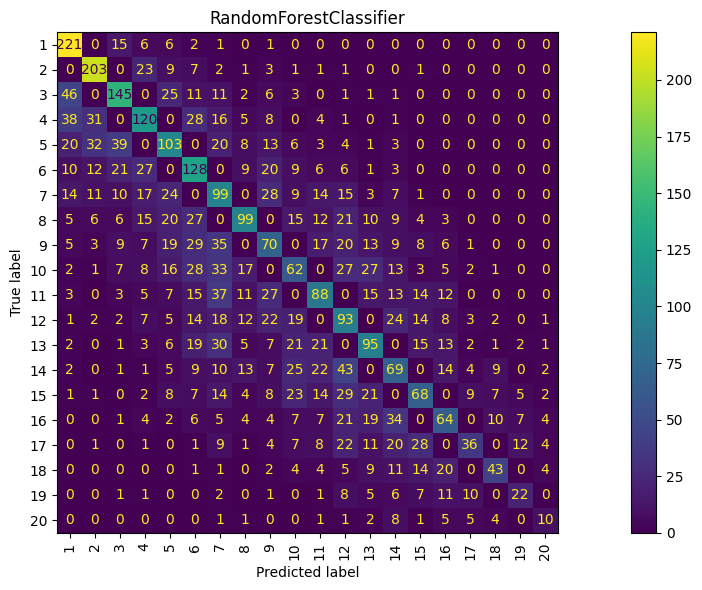

In [5]:
random_forest = RandomForestClassifier(
    n_estimators=303, max_depth=6, criterion="entropy"
)


model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(39, 48)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3978028524622952
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.128927529865145
              precision    recall  f1-score   support

           1       0.63      0.86      0.73       252
           2       0.64      0.78      0.70       252
           3       0.58      0.50      0.54       252
           4       0.52      0.43      0.47       252
           5       0.40      0.48      0.43       252
           6       0.35      0.51      0.42       252
           7       0.39      0.37      0.38       252
           8       0.31      0.27      0.28       252
           9       0.38      0.27      0.32       251
          10       0.34      0.30      0.32       252
          11       0.30      0.35      0.32       250
          12       0.40      0.43      0.42       247
          13       0.32      0.37      0.34       244
     

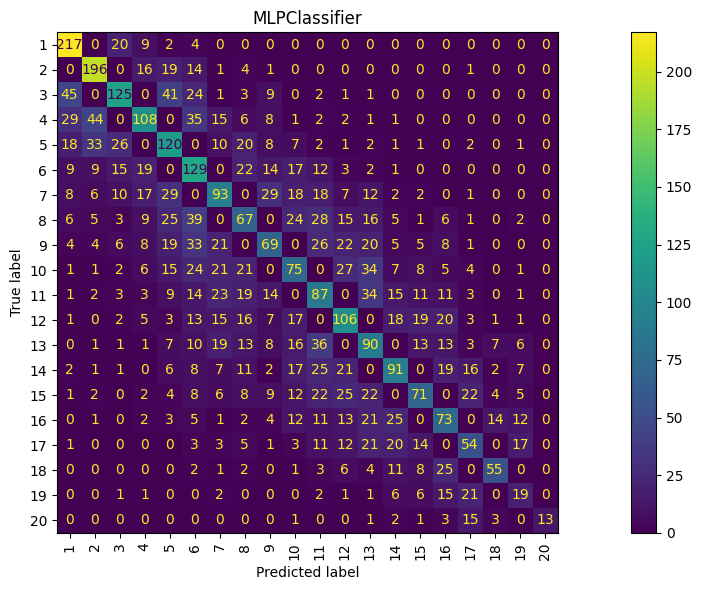

In [6]:
nn = MLPClassifier(hidden_layer_sizes=(39, 48), activation="logistic")
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## XGBClassifier


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...):
CV with make_scorer(balanced_accuracy_1interval_score): 0.415256642723748
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.1755048443675324
              precision    recall  f1-score   support

           0       

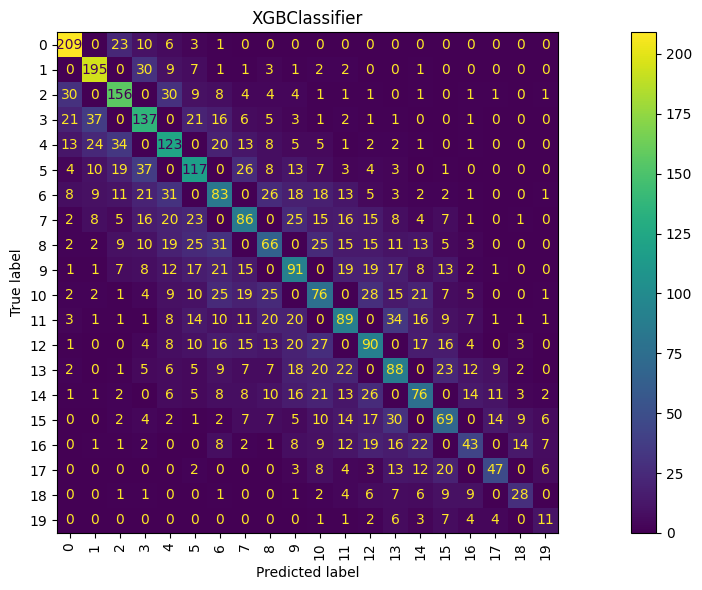

In [7]:
model = XGBClassifier(
    objective="multi:softmax",
    learning_rate=0.1,
    n_estimators=75,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_alpha=2,
    reg_lambda=2,
)
model_test((model,), X, y - 1, tscv, scorers=scorers, interval=1)

## XGBRegressor


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3843026370058104
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.111647245802256
              precision    recall  f1-score   support

           0       0.97      0.56

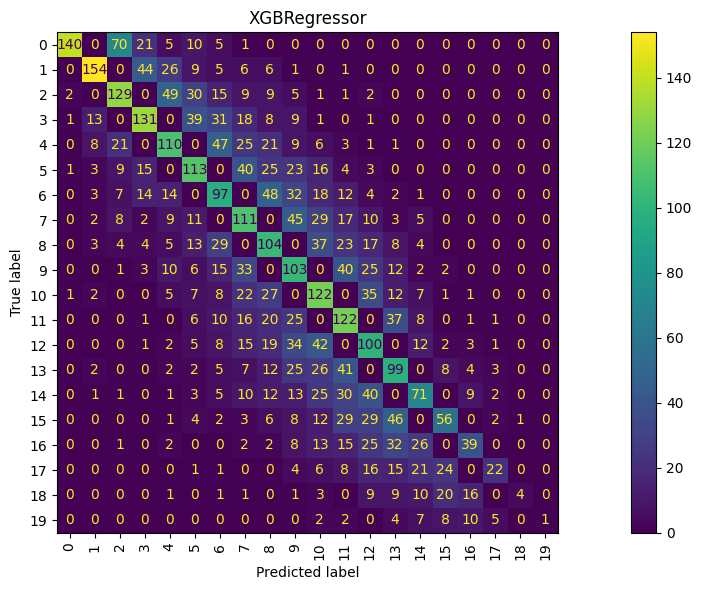

In [8]:
model = XGBRegressor(
    objective="reg:linear",
    learning_rate=0.1,
    n_estimators=75,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_alpha=2,
    reg_lambda=2,
)
model_test((model,), X, y - 1, tscv, scorers=scorers, interval=1)

## XGBRanker


XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=0.75, device=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
          importance_type=None, interaction_constraints=None, learning_rate=0.1,
          max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
          max_delta_step=None, max_depth=3, max_leaves=None, min_child_weight=1,
          missing=nan, monotone_constraints=None, multi_strategy=None,
          n_estimators=75, n_jobs=None, num_parallel_tree=None,
          objective='rank:pairwise', ...):
CV with balanced_accuracy_1interval_ranker: 0.522327745807493
CV with mean_absolute_1interval_ranker: -1.7154524290649638
              precision    recall  f1-score   support

           1       0.81      0.81      0.81       252
           2       0.70      0.73      0.71       252
           3  

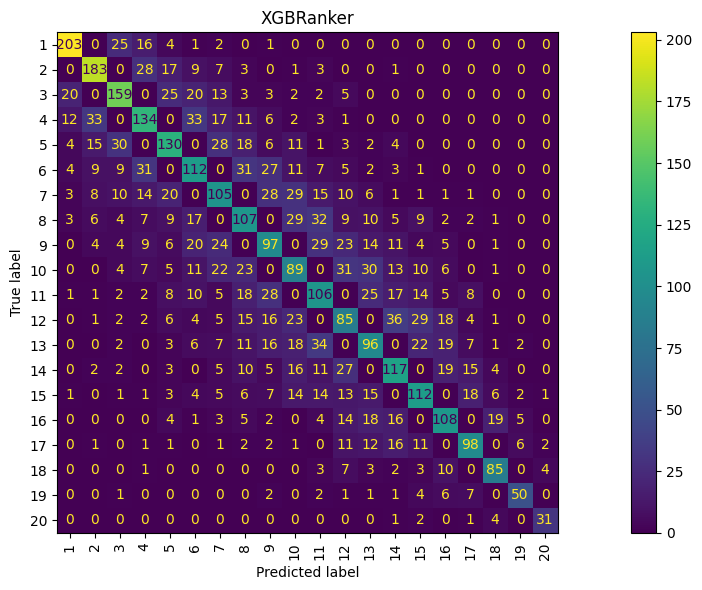

In [9]:
races_per_year = np.cumsum([0] + df.groupby("raceYear")["raceRound"].max().to_list())
set_id = lambda y, r: r + (races_per_year[y - 2006])

X["qid"] = df.apply(lambda x: set_id(x["raceYear"], x["raceRound"]), axis=1)

model = XGBRanker(
    objective="rank:pairwise",
    learning_rate=0.1,
    n_estimators=75,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_alpha=2,
    reg_lambda=2,
)
model_test(
    (model,),
    X,
    y,
    tscv,
    scorers=scorers_ranker,
    interval=1,
    rank=True,
    multiclass=True,
)

## Results


It can be seen that in general the results are maintained or slightly improved, with the difference of the XGBRanker, which has improved drastically.
